## Generating random numbers and samples in python

In [1]:
from random import seed
from random import random

from matplotlib import pyplot as plt

# Random Numbers Generation

#### OneNote: Statistics for ML / Sampling and Resampling / Random Numbers

## ---------------------------------------------------------------------------------------------

### When to use random number generation?
- We want the computer to pick a random number in a given range
- Pick a random element from a list, pick a random card from a deck, flip a coin
- etc. 

### seed the pseudorandom number generator

In [2]:
# seed random number generator
seed(1)

# generate some random numbers
print(random(), random(), random())

# reset the seed
seed(1)

# generate some random numbers
print(random(), random(), random())

0.13436424411240122 0.8474337369372327 0.763774618976614
0.13436424411240122 0.8474337369372327 0.763774618976614


Running the example seeds the pseudorandom number generator with the value 1, generates 3 random numbers, reseeds the generator, and shows that the same three random numbers are generated.

It can be useful to control the randomness by setting the seed to ensure that your code produces the same result each time, such as in a production model.

For running experiments where randomization is used to control for confounding variables, a diﬀerent seed may be used for each experimental run.

## ---------------------------------------------------------------------------------------------

### generate random floating point values
Random ﬂoating point values can be generated using the random() function. Values will be generated in the range between 0 and 1, speciﬁcally in the interval [0,1). Values are drawn from a uniform distribution, meaning each value has an equal chance of being drawn. 

In [3]:
# seed random number generator
seed(1)

# generate random numbers between 0-1
for _ in range(10):
    value = random()
    print(value)

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631


#### scaling
The ﬂoating point values could be rescaled to a desired range by multiplying them by the size of the new range and adding the min value, as follows:

scaledvalue = min + (value×(max−min)) 

Where min and max are the minimum and maximum values of the desired range respectively, and value is the randomly generated ﬂoating point value in the range between 0 and 1.

In [4]:
# generate random numbers between 0-1
for _ in range(10):
    value = random()
    scaledvalue = 1 + (value*(10-1))
    print(scaledvalue)

8.521885935278828
4.89490361114548
7.860520742121478
1.0189544801599961
5.008484746493213
7.493860291067043
3.058859991434074
9.507436259985301
9.112847118503351
1.275309847301982


## ---------------------------------------------------------------------------------------------

### generate random integer values

Random integer values can be generated with the randint() function. This function takes two arguments: the start and the end of the range for the generated integer values. Random integers are generated within and including the start and end of range values, speciﬁcally in the interval [start, end]. Random values are drawn from a uniform distribution. The example below generates 10 random integer values between 0 and 10.

In [5]:
from random import randint

# seed random number generator
seed(1)

# generate some integers
for _ in range(10):
    value = randint(0, 10)
    print(value)

2
9
1
4
1
7
7
7
10
6


In [6]:
# scaling generated integers
for _ in range(10):
    value = randint(0, 10)
    scaledvalue = 100 + (value*(1000-100))  # see above note on scaling
    print(scaledvalue)

2800
1000
6400
100
5500
5500
8200
100
6400
3700


## ---------------------------------------------------------------------------------------------

### Random Gaussian Values
Random ﬂoating point values can be drawn from a Gaussian distribution using the gauss() function. This function takes two arguments that correspond to the parameters that control the size of the distribution, speciﬁcally the mean and the standard deviation. The example below generates 10 random values drawn from a Gaussian distribution with a mean of 0.0 and a standard deviation of 1.0. Note that these parameters are not the bounds on the values and that the spread of the values will be controlled by the bell shape of the distribution, in this case proportionately likely above and below 0.0.

In [7]:
# generate random Gaussian values
from random import seed
from random import gauss

# seed random number generator
seed(1)

# generate some Gaussian values
for _ in range(10):
    value = gauss(0, 1)
    print(value)

1.2881847531554629
1.449445608699771
0.06633580893826191
-0.7645436509716318
-1.0921732151041414
0.03133451683171687
-1.022103170010873
-1.4368294451025299
0.19931197648375384
0.13337460465860485


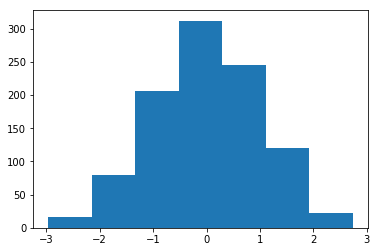

In [8]:
# generate random Gaussian values as a population sample.
# plot with histogram to show the gaussian distribution.

from random import seed
from random import gauss

sample = [ ] # empty list to store the generated random gaussian values

seed(1)  # seed random number generator

# generate some Gaussian values
for _ in range(1000):
    value = gauss(0, 1)
    #print(value)
    sample.append(value)

plt.hist(sample, bins=7)
plt.show()

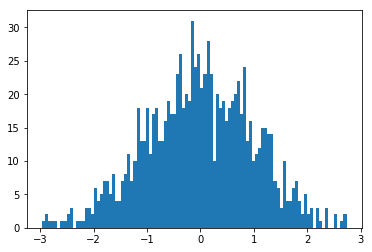

In [9]:
plt.hist(sample, bins=100)
plt.show()

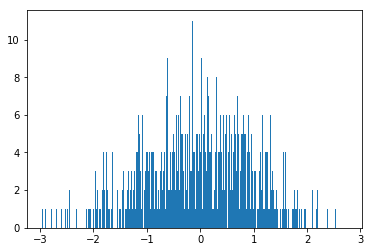

In [10]:
plt.hist(sample, bins=500)
plt.show()

## ---------------------------------------------------------------------------------------------

### Randomly Choosing From a List
Random numbers can be used to randomly choose an item from a list. For example, if a list had 10 items with indexes between 0 and 9, then you could generate a random integer between 0 and 9 and use it to randomly select an item from the list. The choice() function implements this behavior for you. Selections are made with a uniform likelihood. The example below generates a list of 20 integers and gives ﬁve examples of choosing one random item from the list.

In [11]:
# choose a random element from a list
from random import seed
from random import choice

# seed random number generator
seed(1)

# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)

# make choices from the sequence
for _ in range(5):
    selection = choice(sequence)
    print(selection)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
4
18
2
8
3


In [12]:
choice( ['red', 'black', 'green', 'orange', 'white'] )

'orange'

In [13]:
choices = ['red', 'black', 'green', 'orange', 'white']
choice(choices)

'orange'

## ---------------------------------------------------------------------------------------------

### Random Subsample From a List
We may be interested in repeating the random selection of items from a list to create a randomly chosen subset. Importantly, once an item is selected from the list and added to the subset, it should not be added again. This is called selection without replacement because once an item from the list is selected for the subset, it is not added back to the original list (i.e. is not made available for re-selection). This behavior is provided in the sample() function that selects a random sample from a list without replacement. The function takes both the list and the size of the subset to select as arguments. Note that items are not actually removed from the original list, only selected into a copy of the list. The example below demonstrates selecting a subset of ﬁve items from a list of 20 integers.

In [14]:
# select a random sample without replacement
from random import seed
from random import sample

# seed random number generator
seed(1)

# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)

# select a subset without replacement
subset = sample(sequence, 5)
print(subset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4, 18, 2, 8, 3]


## ---------------------------------------------------------------------------------------------

### Randomly Shuﬄe a List
Randomness can be used to shuﬄe a list of items, like shuﬄing a deck of cards. The shuffle() function can be used to shuﬄe a list. The shuﬄe is performed in place, meaning that the list provided as an argument to the shuffle() function is shuﬄed rather than a shuﬄed copy of the list being made and returned. The example below demonstrates randomly shuﬄing a list of integer values.

In [15]:
# randomly shuffle a sequence
from random import seed
from random import shuffle

# seed random number generator
seed(1)

# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)

# randomly shuffle the sequence
shuffle(sequence)
print(sequence)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[11, 5, 17, 19, 9, 0, 16, 1, 15, 6, 10, 13, 14, 12, 7, 3, 8, 2, 18, 4]


# ==============================================

# NumPy

### Random Numbers with NumPy
In machine learning, you are likely using libraries such as scikit-learn and Keras. These libraries make use of NumPy under the covers, a library that makes working with vectors and matrices of numbers very eﬃcient. NumPy also has its own implementation of a pseudorandom number generator and convenience wrapper functions. NumPy also implements the Mersenne Twister pseudorandom number generator. Let’s look at a few examples of generating random numbers and using randomness with NumPy arrays.

#### Seed The Random Number Generator
The NumPy pseudorandom number generator is diﬀerent from the Python standard library pseudorandom number generator. Importantly, seeding the Python pseudorandom number generator does not impact the NumPy pseudorandom number generator. It must be seeded and used separately. The seed() function can be used to seed the NumPy pseudorandom number generator, taking an integer as the seed value. The example below demonstrates how to seed the generator and how reseeding the generator will result in the same sequence of random numbers being generated.

In [16]:
# seed the pseudorandom number generator
from numpy.random import seed
from numpy.random import rand

# seed random number generator
seed(1)

# generate some random numbers
print(rand(3))

# reset the seed
seed(1)

# generate some random numbers
print(rand(3))

[4.17022005e-01 7.20324493e-01 1.14374817e-04]
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


In [17]:
# a more conventional way to call numpy functions
import numpy as np

# seed random number generator
np.random.seed(1)

# generate some random numbers
print(np.random.rand(3))

# reset the seed
np.random.seed(1)

# generate some random numbers
print(np.random.rand(3))

[4.17022005e-01 7.20324493e-01 1.14374817e-04]
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


### Array of Random Floating Point Values
An array of random ﬂoating point values can be generated with the rand() NumPy function. If no argument is provided, then a single random value is created, otherwise the size of the array can be speciﬁed. The example below creates an array of 10 random ﬂoating point values drawn from a uniform distribution.

In [18]:
# generate random floating point values
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(1)
# generate random numbers between 0-1
values = rand(10)
print(values)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]


### Array of Random Integer Values
An array of random integers can be generated using the randint() NumPy function. This function takes three arguments, the lower end of the range, the upper end of the range, and the number of integer values to generate or the size of the array. Random integers will be drawn from a uniform distribution including the lower value and excluding the upper value, e.g. in the interval [lower, upper). The example below demonstrates generating an array of random integers.

In [19]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
values = randint(0, 10, 20)
print(values)

[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9]


### Array of Random Gaussian Values
An array of random Gaussian values can be generated using the randn() NumPy function. This function takes a single argument to specify the size of the resulting array. The Gaussian values are drawn from a standard Gaussian distribution; this is a distribution that has a mean of 0.0 and a standard deviation of 1.0. The example below shows how to generate an array of random Gaussian values.

In [20]:
# generate random Gaussian values
from numpy.random import seed
from numpy.random import randn
# seed random number generator
seed(1)
# generate some Gaussian values
values = randn(10)
print(values)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


### Scaling
Values from a standard Gaussian distribution can be scaled by multiplying the value by the standard deviation and adding the mean from the desired scaled distribution.

For example:
scaledvalue = mean + value×stdev 

Where mean and stdev are the mean and standard deviation for the desired scaled Gaussian distribution and value is the randomly generated value from a standard Gaussian distribution.

In [21]:
# generate random Gaussian values
from numpy.random import seed
from numpy.random import randn
# seed random number generator
seed(1)
# generate some Gaussian values
values = randn(10)
scaledvalues = 10 + values * 2.5   # mean = 10, standard deviation = 2.5
print(scaledvalues)

[14.06086341  8.47060897  8.67957062  7.31757844 12.16351907  4.24615326
 14.36202941  8.09698275 10.79759774  9.37657406]


In [22]:
print(scaledvalues.mean())  # mean of the scaled values
print(scaledvalues.std())   # standard deviation of the scaled values

9.75714777298475
2.977246380159755


### Shuﬄe NumPy Array
A NumPy array can be randomly shuﬄed in-place using the shuffle() NumPy function. The example below demonstrates how to shuﬄe a NumPy array.

In [23]:
# randomly shuffle a sequence
from numpy.random import seed
from numpy.random import shuffle
# seed random number generator
seed(1)
# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)
# randomly shuffle the sequence
shuffle(sequence)
print(sequence)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[3, 16, 6, 10, 2, 14, 4, 17, 7, 1, 13, 0, 19, 18, 9, 15, 8, 12, 11, 5]
